sklearn 案例1 Iris分類 (Classification)

In [1]:
# style2paints   # 線稿自動上色
# stargan        # 輸入普通照片，可以產出喜路哀樂等等表情的照片
# edge cat

In [2]:
import pandas as pd
import sklearn

In [3]:
# 機器學習 / 深度學習
# step1 : 準備資料 <- 不需要自己篩選資料相關性
#         1. 有答案 : 監督式學習
#         2. 沒有答案 : 非監督式學習
#         3. 自動車等等 : 半監控式學習
# step2 : 建立 & 訓練模型
# step3 : 利用模型預測 -> 監督式，非監督式，強化學習

In [4]:
# graphviz   # 先安裝graphviz軟體了
from sklearn.datasets import load_iris
iris = load_iris()


In [5]:
# pandas 資料集讀取，整理
df = pd.DataFrame(iris["data"],columns = iris["feature_names"])
   # key: data -> 對應到四欄資料   feature_names -> 欄位名稱
df["target"] = iris["target"]
   # 將，iris "target"欄位資料 帶入df中   (df成為5欄位的資料)
#df.to_csv("iris.csv", encoding = "UTF-8", index = False)   # index 將系統預設的index帶入csv檔案中?
   # 儲存為csv，取消 default index
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# 相關係數圖
# 上面的資料，有花萼長，寬 / 花瓣長，寬 (data) 與 是哪一種花 (target)
# 目的 : 我們要輸入某花的 花萼花瓣長寬，系統自動判定是哪一種花
# 有題目，有答案 : 監督式
# 預測出來的答案，有大小關係嗎?   -> 花種之間沒有大小關係   (如有大小，迴歸)
# 此為 : 監督式分類法

# 之後遇到相關問題都需要先思考 : data每個特徵 / target相關性
# 特徵與相關性   越有正相關   代表影響性越高   -> 這個邏輯在迴歸時，較為適用 / 分類比較不準

<Figure size 3000x3000 with 0 Axes>

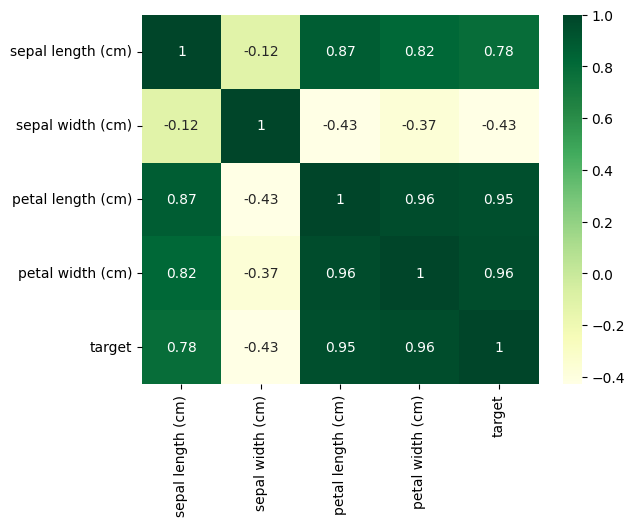

<Figure size 3000x3000 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib inline 為jupyter專用，可以省去plt.show()

# 熱度圖
sns.heatmap(df.astype("float").corr(), cmap= "YlGn", annot= True)
   # heatmap(相關係數矩陣, cmap(熱度圖顏色), annot(顯示每個相關係數值))
plt.figure(figsize=(30, 30))   # 重新設定輸出圖的寬高

# 更改輸出圖的顏色   (cmap: colormap)   (https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [8]:
df.corr()   # 可以直接判斷關係圖
# 等等的ML，會以 petal width 為第一判斷點，因為相關係數最高
# astype 轉換資料型態

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [9]:
# 通常data 90% 會用於訓練模型 / 10% 會用於驗證模型準確性
# 驗證
from sklearn.model_selection import train_test_split
# train_test_split -> 特徵的90% 特徵的10% / 目標的90% 目標的10%   # 會產生四個值的 tuple
# 將資料分成四部分: 特徵   &   目標
#                  9:1        9:1

# x代表四特徵 / y代表最後結果
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"],axis=1), df["target"], test_size=0.1)
# axis=0 列; axis=1 行 
# 第一參數: df.drop: 去除df target欄位資料，axis=1 代表欄位，0則代表列
# 第二參數: 目標資料 df["target"]
# test_size: 90% 訓練模型， 10% 驗證模型的準確性

In [10]:
# sklearn.tree   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
from sklearn.tree import DecisionTreeClassifier   # 分類

# 習慣命名clf
clf = DecisionTreeClassifier(max_depth=3)   # 最多往下分析三層

# 帶入 90% training 資料   (90%四特徵 & 90%四特徵的答案)
clf.fit(x_train, y_train)

# 完成訓練模型後，需要將訓練模型圖示化

DecisionTreeClassifier(max_depth=3)

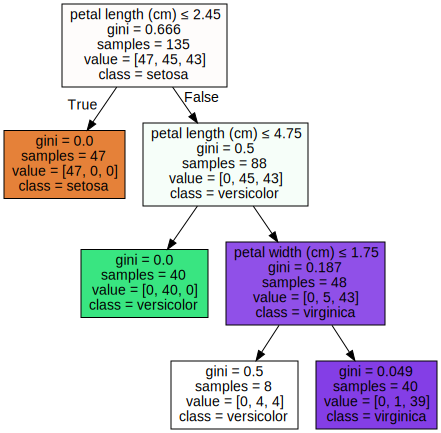

In [11]:
# 繪製決策樹
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf,                                     # 分類樹
                    out_file= None,                          # 不輸出檔案
                    feature_names= iris["feature_names"],    # 特徵名
                    class_names = iris["target_names"],      # 答案名-此為iris中的 target_names
                    filled= True,                            # 圖形要不要填入顏色
                    special_characters= True)                # 如果有特殊符號，要不要顯示
# g 是方格敘述圖

graph = graphviz.Source(g)
# graph 將方格敘述圖化成圖像

graph

In [12]:
# clf.fit(x_train, y_train)   # 剛剛上方的訓練模型

pre = clf.predict(x_test)     # 將測試資料帶入，實驗

print("預測結果: ", list(pre))
print("真正標籤: ", list(y_test))

# 僅有一組預測與真正標籤不同   (每次都是隨機抽樣，結果不一定依樣)

預測結果:  [0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0]
真正標籤:  [0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0]


In [13]:
# 上面是一個一個比對測試結果 & 真實標籤
# 自動計算正確率
from sklearn.metrics import accuracy_score
print("正確率: ", accuracy_score(pre,y_test))   # 預測成功的機率
# 每次取樹都是隨機的，所以每次預測出來的正確率都會不太一樣

正確率:  0.9333333333333333


In [14]:
# 混淆矩陣   (https://scikit-learn.org/stable/modules/classes.html)
# confusion_matrix   (日後可以用於修正模型，分辨那些數據較容易被我們設計的模型混淆)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pre)
# 不在對角線上的數據，就是錯誤的數據

pd.DataFrame(confusion_matrix(y_test, pre))
# 實際標籤 : 0, 1, 2   預測標籤 : 0, 1, 2   如數據都集中在對角線上，100% 正確
# 0 被正確預測為0的，有n個 ...

,0,1,2
0,3,0,0
1,0,5,0
2,0,1,6


In [15]:
# 決策樹中的吉尼係數
# 例如100位工程師，經過第一次分類 :    (尚未分類的資料，最雜亂，亂度1)
# 50% 工程師     <- (被分類後，此區資料都是工程師，已經分類完畢，亂度0)
# 50% 非工程師   <-  
# 當節點的吉尼係數越小，表示該節點的純度越高，節點的分裂策略越好。
# 在決策樹的建立過程中，通常選擇使得分裂後吉尼係數下降最多的分裂策略。

In [16]:
# 避免分析過頭的參數...以下舉例
# DecisionTreeClassifier   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
# max_depth                  最多分幾層
# min_samples_split          最小取樣數
# ... 

sklearn 案例2 加州房價 (Regression)

In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
ca = fetch_california_housing()

df = pd.DataFrame(ca["data"], columns= ca["feature_names"])
df["target"]= ca["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ca["data"],
                                                    ca["target"],
                                                    test_size=0.1)

In [19]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

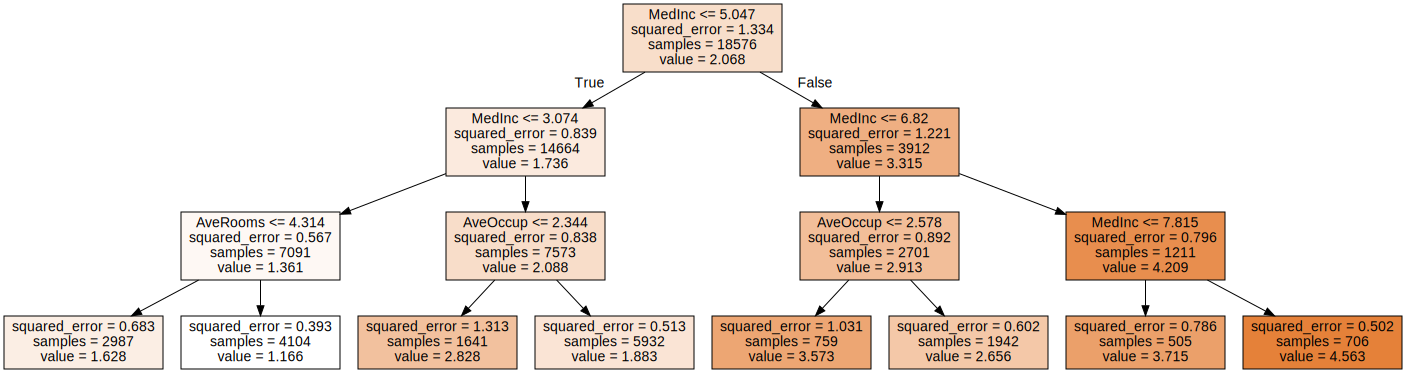

In [20]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, out_file= None,
                    feature_names= ca["feature_names"],
                    filled= True)

graphviz.Source(g)
# 此圖非常大，要跑的時間很久，所以先註解起來   (過擬合)
# 因 (max_depth=5) 設定參數防止過擬合了，所以可以 print 圖

In [21]:
print("預測結果: ", list(reg.predict(x_test)))   # (DecisionTreeRegressor())
print("正確結果: ", list(y_test))

# Regression 沒有分類正確與否，所以沒有正確率
# Regression 預測數值離正確數值越近，則越精準

預測結果:  [1.6278829260127265, 2.655749891864059, 1.1659956335282684, 1.8827979214430184, 1.8827979214430184, 1.8827979214430184, 1.6278829260127265, 1.8827979214430184, 1.1659956335282684, 2.655749891864059, 2.655749891864059, 2.655749891864059, 2.8279252346130495, 2.655749891864059, 1.6278829260127265, 1.8827979214430184, 1.1659956335282684, 1.8827979214430184, 2.8279252346130495, 4.563246855524104, 2.655749891864059, 1.8827979214430184, 2.655749891864059, 1.6278829260127265, 1.6278829260127265, 1.6278829260127265, 1.1659956335282684, 4.563246855524104, 1.6278829260127265, 2.8279252346130495, 1.8827979214430184, 1.8827979214430184, 1.1659956335282684, 1.8827979214430184, 1.1659956335282684, 2.655749891864059, 3.7146294653465324, 4.563246855524104, 1.8827979214430184, 1.8827979214430184, 1.8827979214430184, 1.8827979214430184, 1.1659956335282684, 3.5729582345191084, 1.8827979214430184, 1.1659956335282684, 2.8279252346130495, 1.6278829260127265, 2.655749891864059, 1.8827979214430184, 1.88

In [22]:
# 上面的 預測結果 vs 正確結果 數據輛過於龐大，如何在Regressor中，判斷正確率
# 課程所需符號，事先溝通 : 
# _fi_ -> 所有測試資料值平均 (target平均)
# fi -> 第 i 筆測試資料的值          (真實資料)
# pi -> 第 i 筆測試，預測的值     (預測資料)

# b = (fi - _fi_) ** 2   -> 每筆資料，離平均值，差距有多少 (平方是為了使差距變為正數)
# !!!  b 的意思其實是 : 資料本身內容的廣度大小   !!!
# ex 班上考試分數，平均60分。 廣度越大，代表大家考的分數離60分越遠。

# a = (pi - fi) ** 2   -> 預測值 vs 真實值，差距有多少
# a 預測的準不準 / a 越小越準   !!!   預測值與資料，差距的大小   !!!


# 往後 ML 中會有許多數學計算，訣竅 : 注意"特別值"的含意   !!!

# 我們需要計算 a / b 
# 特別值 0 : a = 0 代表我們預測的值 與 真實的值                意義: 100% 吻合
# 特別值 1 : a = b 代表我方每個預測值 都 直接猜測與平均值相同   意義: 亂猜

# 代表 : 0是準，1是不準，但此數據違反人類直覺，所以更改為
# 求 : 1 - a/b   1準 / 0不準)   <- 此為 r2_score   ()

# 經驗上 clf正確率75%-80%可接受 ; reg r2_score 0.5 就可接受

In [23]:
from sklearn.metrics import r2_score   # (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

print("r2_score: ", r2_score(y_test, reg.predict(x_test)))

r2_score:  0.5329094538131867


In [24]:
# 回到 cell[69]   重新設計 -> 防止過擬合
# 目前人工測試 max_depth= 5 準確度可以到0.6以上
# 資料集中的欄位代表意義
"""
    MedInc   該區域收入的中位數。
    HouseAge   該區域房屋的平均房齡。
    AveRooms   該區域房屋的平均房間數。
    AveBedrms   該區域房屋的平均臥室數。
    Population   該區域居民人數。
    AveOccup   該區域平均每戶居住人數。
    Latitude   該區域的緯度。
    Longitude   該區域的經度。
"""
# 越上面分類的因素，越影響房價 -> 此次分析 MedInc > AveRooms = AveOccup > HouseAge

'\n    MedInc   該區域收入的中位數。\n    HouseAge   該區域房屋的平均房齡。\n    AveRooms   該區域房屋的平均房間數。\n    AveBedrms   該區域房屋的平均臥室數。\n    Population   該區域居民人數。\n    AveOccup   該區域平均每戶居住人數。\n    Latitude   該區域的緯度。\n    Longitude   該區域的經度。\n'

sklearn 案例3 Iris (Cluster)

In [25]:
# KMeans 解說:
# 1. 10 個點，想要分成三群
# 2. 先隨便找3個點 (三個圓心)
# 3. 將剩餘的點，依上面三個點為主，分成三群

#### 逐步修正，並循環

# 4. 修正 : 重新於三個圓當中，選擇圓心
# 5. 修正 : 將其餘七個點，再次分配到三個新的圓心   (可能會產生三個新的圓)
# 6. 重複4. 5. 兩步驟，直到圓心不會再次改變，就停止。

In [26]:
# load iris資料 & 創立df
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris()
df= pd.DataFrame(iris["data"], columns= iris["feature_names"])
df["target"]= iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
# 90%題目 10%題目 90%答案 10%答案
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(
iris["data"],   # data -> 90% data / 10% data
iris["target"], # target -> 90% target / 10% target
test_size= 0.1)


In [28]:
# 做公式   (已知答案有幾種時，K值可以直接選)
from sklearn.cluster import KMeans
clu= KMeans(n_clusters= 3)   # K值
clu.fit(x_train)             # 僅帶入題目

c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
# KMeans   (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
clu.labels_   # 自動依照 K值 分群   # 此處標籤的012 不等於答案的012

array([2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 1, 0])

In [30]:
# 不知道K值 的思考邏輯
# a : 與同一個圓中，其他人的平均距離
# b : 與最近的圓中，該圓中所有人的平均距離
# a <= b 才正常 / 目標，a越小越好 / b越大越好
# a * (1/b)   -> a/b 此數值，越小越好
# a/b 極端值 : a=0 自己圈中，所有人都在同一點 / a=b 跟自己圈中距離一樣，跟其他圈中距離也一樣 (會不知道該分在哪一類較好)

In [41]:
# silhouette score   (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
from sklearn.metrics import silhouette_score

x= df.drop(["target"], axis=1)   # 模擬不知道答案，不知道K值

plotx= []
ploty= []

for k in range(2,6):
    clu= KMeans(n_clusters=k, n_init=10)    # 將K值，從 2 猜到 5   #(The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    clu.fit(x)
    s= silhouette_score(x, clu.labels_)
    plotx.append(k)
    ploty.append(s)
print("K值: ", plotx)
print("Score: ", ploty)


K值:  [2, 3, 4, 5]
Score:  [0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566]


Text(0, 0.5, 'Score')

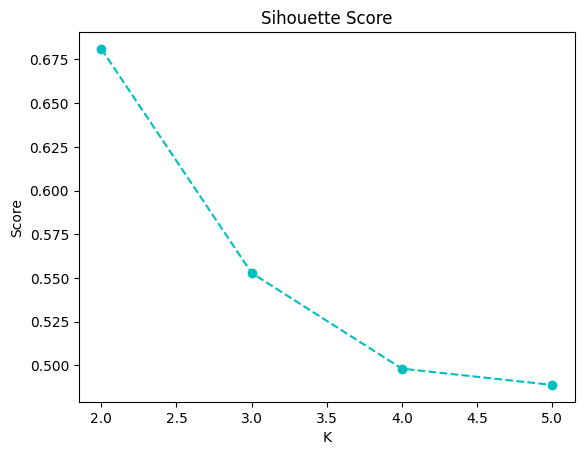

In [42]:
import matplotlib.pyplot as plt   #(https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
plt.plot(plotx, ploty, "co--")    # "" 顏色, 點圖示, 線圖示
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Score")

整理  
選擇題 : Iris (Classification)  
答案 : 類別  
判斷標準 : accuracy score 75-80 OK / 80-9- Good  
  
計算題 : 加州房價 (Regression)
答案 : 連續  
判斷標準 : r2 score 0.5~ OK / 0.7~ Good  
  
分群問題 : Iris (KMeans)   (Iris 已知答案 K=3 / 此處問題 K=?)  
沒有答案  
判斷標準 : 輸出多個K值，比較各個分數

sklearn 案例4 單純貝氏 (文字機械學習)

In [33]:
# P(A)   事件A 發生的機率
# P(A|B)   事件A 在B條件下 發生的機率
# 機率數學中，連續發生，慣用* / 同時發生，慣用+

# P(A) * P(B|A)   -> A發生機率 * A發生條件下，B發生機率   -> 等於 AB同時發生的機率
# P(B) * P(A|B)   -> 會同上 都等於 AB同時發生的機率

# P(A)*P(B|A) = P(B)*P(A|B)   往下推導 (同時除以 P(A))
# P(B|A) = P(B) / P(A) * P(A|B)

# 文字解釋: 看到一篇，我喜歡酒的文章，要推測此文章是李白寫的機率是多少?   (非常難)

# 經過單純貝氏 推導 :
# 推導 1 
# (所有文章挑中作者為李白的機率)
# -----------------------------------   *   (設李白所有文章，是我喜歡酒，的機率)
# (所有文章中挑中我喜歡酒文章的機率)

# (所有文章挑中作者為杜甫的機率)
# -----------------------------------   *   (設杜甫所有文章，是我喜歡酒，的機率)
# (所有文章中挑中我喜歡酒文章的機率)

# 兩者機率比較，可以往下 推測出文章是李白還是杜甫所寫   (比較機率大小，不用精準到兩機率相加為一)


# 推導 2
# 兩個公式中都有 (所有文章中挑中我喜歡酒文章的機率) 所以約分掉
# (所有文章挑中作者為李白的機率) * (設李白所有文章，是我喜歡酒，的機率)
# vs
# (所有文章挑中作者為杜甫的機率) * (設杜甫所有文章，是我喜歡酒，的機率)


# 推導3
# (設李白所有文章，是我喜歡酒，的機率)   非常難計算，這邊轉換思考 (資料中，每個詞彙的出現都給予機率)
# 所有詞彙中李白寫出:我 的機率 * 李白寫出:喜歡 的機率 * 寫出: 酒 的機率   (連續發生)

In [34]:
import pandas as pd
traindf= pd.read_csv("poem_train.csv", encoding= "utf-8")
testdf= pd.read_csv("poem_test.csv", encoding= "utf-8")

In [35]:
# 使用 jieba 分詞
import jieba
s= "青天有月來幾時"
" ".join(jieba.cut(s))   # cut -> [詞1, 詞2]，並使用join將詞以空白區隔後，組合起來


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\李重誼\AppData\Local\Temp\jieba.cache
Loading model cost 1.491 seconds.
Prefix dict has been built successfully.


'青天 有 月 來 幾時'

In [36]:
# 將 jieba 分詞套入pandas中
def poem(s):
    # s.replace("\r", "")   # 去除換行符號
    # s.replace("\n", "")   # 去除換行符號，簡化如下
    s= s.replace("\r", "").replace("\n", "")
    return " ".join(jieba.cut(s))

traindf["內容"]= traindf["內容"].apply(poem)
testdf["內容"]= testdf["內容"].apply(poem)

In [37]:
# scikit-learn: 答案一定要變成整數
trans= {"李白":0, "杜甫":1, "白居易":2}
traindf["作者"]= traindf["作者"].replace(trans)
testdf["作者"]= testdf["作者"].replace(trans)

In [38]:
# 將內容的詞，轉換為次數統計，才可以計算全部多少詞彙，以計算某詞彙出現機率
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizer 的兩個使用方法
# fir: 統計 "多少種" 標籤
# transform: 根據標籤，統計次數

# 訓練: fir -> transform   # 邏輯: 訓練時，就決定標籤了
# 測試: transform          # 所以: 測試時，看到沒看過的標籤，就忽略不計算

vec= CountVectorizer()
trainvec= vec.fit_transform(traindf["內容"])
# print(trainvec)
# 2731 * 51287 sparse matrix -> 2731列資料，有51287種不同詞彙  (稀疏矩陣，僅儲存非0的值)
# (0, 15827) 1   第0首詩，第15827詞彙，出現1次
# (1, 48882) 1   第1首詩，第48828詞彙，出現1次 ...

# print(vec.vocabulary_)   可以看到各個詞彙的標籤號碼

testvec= vec.transform(testdf["內容"])
# print(testvec)

# 至此為止，資料都整理完畢 : 作者，已轉換為0-2 / 內容已分詞 / 對分詞後內容，標籤與統計數量

In [ ]:
# 不同種的單純貝氏   (https://scikit-learn.org/stable/modules/naive_bayes.html)
# 需視情況使用   (視 input 的資料而定)

# 1 高斯單純貝氏 (Gaussian Naive Bayes) -> "連續特徵" (ex iris花瓣長度 寬度)
# 通常用於數值特徵，假設特徵是從高斯分布中抽樣得到的。 (鐘形曲線)

# 2 多項式單純貝氏 (Multinomial Naive Bayes) -> "整數特徵" (ex 詩詞詞彙，擲骰子)
# 通常用於文本分類，假設特徵是多個符號或單詞，並且每個符號或單詞可以出現多次。

# 3 伯努利單純貝氏 (Bernoulli Naive Bayes) ->  "2的進化" (ex 某特徵 出現 or 不出現)
# 也用於文本分類，但是假設特徵是二元的，即符號或單詞要麼出現要麼不出現。

### 4 多變量單純貝氏 (Multivariate Naive Bayes) -> 
###  假設特徵之間存在某種相互關係，因此在計算條件概率時，需要同時考慮多個特徵。

In [57]:
# 做公式出來
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB(alpha=1)   # alpha=1  ->  Laplace smoothing 下方有解釋
clf.fit(trainvec, traindf["作者"])

MultinomialNB(alpha=1)

In [45]:
# 驗證模型好壞
from sklearn.metrics import accuracy_score
pre= clf.predict(testvec)
print("預測結果: ", list(pre))
print("正確結果: ", list(testdf["作者"]))
print("正確率: ", accuracy_score(pre, testdf["作者"]))

預測結果:  [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1]
正確結果:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
正確率:  0.8


In [56]:
s= input("來首詩吧: ")
# 當我們要predict時，一定要是一個群集 (list or Series)
inputs= [poem(s)]   # poem 是上方切割的功能   # 分詞 & 組合成List
# 想要測試的詩

x= vec.transform(inputs)                      # 放到數詞彙次數的功能鐘
#clf.predict(x)                               # predict
# 此時返還群集 : array([1]

# clf.predict(x)[0]
# 此時返還 1

reverse_trans= {0:"李白", 1:"杜甫", 2:"白居易"}
pre= clf.predict(x)[0]
reverse_trans[pre]

print("預測的作者為:", reverse_trans[pre])

預測的作者為: 李白


In [ ]:
# ML 問題: 我們是否需要事先篩選資料特徵?   ex 詩詞預測，需要先篩選掉你我他 這種詞彙嗎?
# A: 不需要，這種常用詞，大家使用機率都一樣的話，模型會自動剔除

# TfidfVectorizer 依照詞彙出現頻率，給予重要性分數   (越常出現，越不重要)
#                         1
# 出現次數 * -------------------------------
#                      常用程度

# 此處介紹此模型，僅用於解釋，我們不用事先對特徵進行篩選。

# 額外補充 Multinomial Naive Bayes 公式中，
# 分子的阿法: 代表每個詞彙標籤次數+1 分母的阿法代表 標簽數*1
# 目的:
# 為了避免 某標籤，出現次數為零，導致整體計算機率都為0，所以每個標籤都加一
# 分母為 所有標籤出現次數。所以當分子的每個標籤都加一，分母也要同時加上欄位數*1
# 可以問ChatGPT   Laplace smoothing 可以得到解釋